In [2]:
import pandas as pd
import numpy as np

In [3]:
# read data
customers = pd.read_csv('data\cust_features.csv')

# examine the first few data records
customers.head()

,Unnamed: 0,user_id,tot_ord,tot_spent,avg_days_btwn_ord,avg_basket_size,most_freq_aisle,most_freq_timing,most_freq_dow
0,1,1,11,286.85,19.200000,26.077273,soft drinks,morning,4
1,2,2,15,904.28,18.009390,60.285333,yogurt,morning,1
2,3,3,12,634.85,11.487179,52.904167,fresh fruits,evening,0
3,4,4,5,205.99,15.357143,41.198000,frozen meals,afternoon,4
4,5,5,5,218.55,12.314286,43.710000,packaged vegetables fruits,evening,0


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 9 columns):
Unnamed: 0           206209 non-null int64
user_id              206209 non-null int64
tot_ord              206209 non-null int64
tot_spent            206209 non-null float64
avg_days_btwn_ord    206209 non-null float64
avg_basket_size      206209 non-null float64
most_freq_aisle      206209 non-null object
most_freq_timing     206209 non-null object
most_freq_dow        206209 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 14.2+ MB


In [5]:
customers['tot_ord'].describe()

count    206209.000000
mean         16.226658
std          16.662238
min           3.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: tot_ord, dtype: float64

In [6]:
customers['tot_spent'].describe()

count    206209.000000
mean        912.052832
std        1214.616155
min           4.200000
25%         230.240000
50%         493.020000
75%        1085.700000
max       31723.670000
Name: tot_spent, dtype: float64

In [7]:
# create negative avg_days_btwn_ord
customers['avgdaysbtwnord'] = customers['avg_days_btwn_ord'].apply(lambda x : -1 * x ) 

In [8]:
customers['avgdaysbtwnord'].describe()

count    206209.000000
mean        -15.631327
std           7.090661
min         -30.000000
25%         -20.916667
50%         -15.000000
75%          -9.809524
max          -0.000000
Name: avgdaysbtwnord, dtype: float64

In [9]:
customers[['avgdaysbtwnord','tot_ord','tot_spent']].count()

avgdaysbtwnord    206209
tot_ord           206209
tot_spent         206209
dtype: int64

In [10]:
# segmentation
#qcut - ensures same number of records in each bin
customers['e'] = pd.qcut(customers['avgdaysbtwnord'], 3, ['1','2','3'])
customers['m'] = pd.qcut(customers['tot_spent'], 5, ['1','2','3','4','5'], duplicates = 'drop')

In [11]:
def f(x):
    f = ''
    if x <= 10:
        f = '1'
    elif 10 < x <= 20:
        f = '2'
    else:
        f = '3'
    return f

In [12]:
customers['f'] = customers['tot_ord'].apply(lambda x: f(x))

In [13]:
customers.groupby('f')['tot_ord'].describe()

,count,mean,std,min,25%,50%,75%,max
f,,,,,,,,
1,107431.0,6.093502,2.089899,3.0,4.0,6.0,8.0,10.0
2,49098.0,14.693715,2.811193,11.0,12.0,14.0,17.0,20.0
3,49680.0,39.654187,19.023777,21.0,26.0,33.0,48.0,100.0


In [14]:
customers['CS1'] = customers[['e','f','m']].apply(lambda x: ''.join(x), axis=1)

In [15]:
customers.head()

,Unnamed: 0,user_id,tot_ord,tot_spent,avg_days_btwn_ord,avg_basket_size,most_freq_aisle,most_freq_timing,most_freq_dow,avgdaysbtwnord,e,m,f,CS1
0,1,1,11,286.85,19.200000,26.077273,soft drinks,morning,4,-19.200000,1,2,2,122
1,2,2,15,904.28,18.009390,60.285333,yogurt,morning,1,-18.009390,2,4,2,224
2,3,3,12,634.85,11.487179,52.904167,fresh fruits,evening,0,-11.487179,3,3,2,323
3,4,4,5,205.99,15.357143,41.198000,frozen meals,afternoon,4,-15.357143,2,2,1,212
4,5,5,5,218.55,12.314286,43.710000,packaged vegetables fruits,evening,0,-12.314286,2,2,1,212


In [16]:
customers.to_csv('efm.csv')

In [21]:
customers.groupby('e')['avgdaysbtwnord'].describe()

,count,mean,std,min,25%,50%,75%,max
e,,,,,,,,
1,68741.0,-23.933434,3.483512,-30.000000,-26.666667,-23.387097,-20.915842,-18.777778
2,68732.0,-15.060907,2.083063,-18.777202,-16.843137,-15.000000,-13.259259,-11.522727
3,68736.0,-7.899003,2.305193,-11.522472,-9.809524,-8.091549,-6.331320,-0.000000


In [22]:
customers.groupby('m')['tot_spent'].describe()

,count,mean,std,min,25%,50%,75%,max
m,,,,,,,,
1,41242.0,110.295572,48.659098,4.20,70.9200,112.995,152.1475,190.61
2,41242.0,275.220633,51.398186,190.62,230.2400,273.065,318.8375,369.66
3,41242.0,500.389543,83.501420,369.67,427.0350,493.020,570.0100,661.34
4,41241.0,936.290385,186.896581,661.35,772.4800,910.300,1085.7000,1322.77
5,41242.0,2738.068614,1666.370244,1322.83,1657.0425,2186.705,3207.8375,31723.67


In [23]:
customers['CS1'].value_counts()

335    26093
111    21694
112    17579
113    12304
224     9946
212     9662
211     9284
213     7787
334     7488
223     6621
311     6366
235     6034
312     5922
114     5139
324     4732
313     4549
225     4338
234     4255
124     3920
214     3551
323     3260
222     3070
123     3003
333     2332
314     2201
325     1995
122     1787
322     1608
221     1436
125     1381
233     1380
121     1271
332      865
232      741
321      730
115      627
215      400
315      366
331      229
231      227
134        9
135        8
132        8
133        6
131        5
Name: CS1, dtype: int64

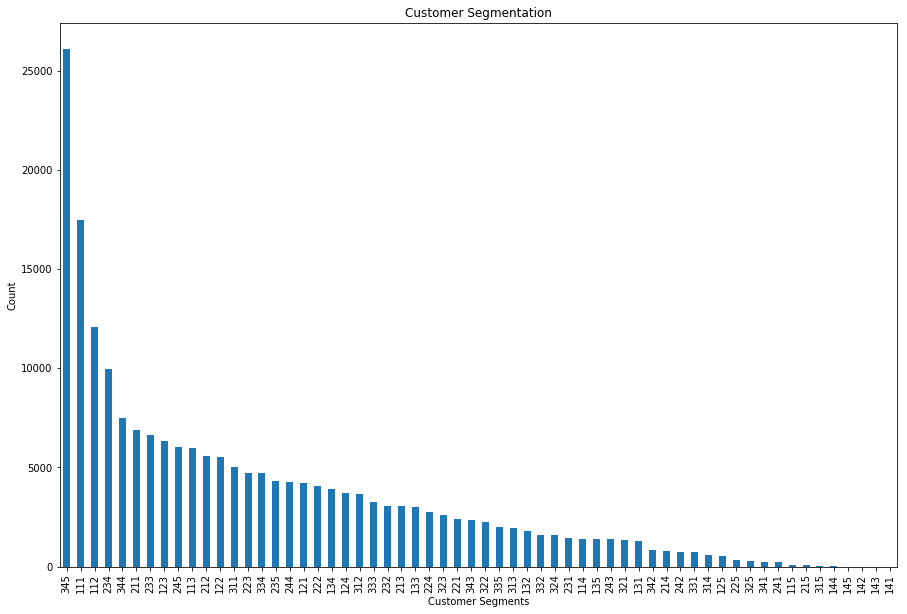

In [125]:
b1 = customers['CS1'].value_counts().plot(kind='bar',
                                    figsize=(15,10),
                                    title="Customer Segmentation")
b1.set_xlabel("Customer Segments")
b1.set_ylabel("Count")
plt.show()